## Requirements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the dataset

In [3]:
data_raw = pd.read_csv('./data/FuelConsumption.csv')
data_raw.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's use only the important fields

In [5]:
data = data_raw[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


## Polynomial Regression Model

## Create train and test datasets

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

mask = np.random.rand(len(data_raw)) < 0.8
train = data_raw[mask]
test = data_raw[~mask]

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

train_x[0:5]

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5]])

### We have to transform them into 2-dimensional models

In [19]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

train_x_poly[0:5]

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25]])

### Linear Regression

In [20]:
linearReg = linear_model.LinearRegression()
train_y = linearReg.fit(train_x_poly, train_y)

In [21]:
print('Coefficients: ', linearReg.coef_)
print('Intercept: ', linearReg.intercept_)

Coefficients:  [[ 0.         52.47703235 -1.7878664 ]]
Intercept:  [104.21543693]


### To see a graph with these informations

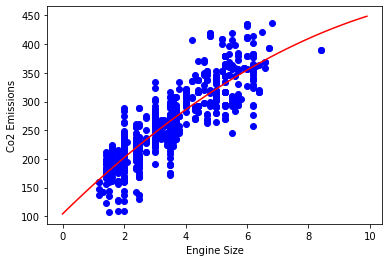

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
dimension_x = np.arange(0.0, 10.0, 0.1)
dimension_y = linearReg.intercept_[0] + linearReg.coef_[0][1]*dimension_x + linearReg.coef_[0][2]*np.power(dimension_x, 2)
plt.plot(dimension_x, dimension_y, color='red')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.show()

## Evaluate

In [23]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_evaluate = linearReg.predict(test_x_poly)

print('Mean absolute error (the lower the better): {:.2f}'.format( np.mean(np.absolute(test_y_evaluate - test_y)) ))
print('Residual sum of squares (the lower the better): {:.2f}'.format( np.mean(test_y_evaluate - test_y) ** 2 ))
print('R2 Score (the higher the better): {:.2f}'.format( r2_score(test_y, test_y_evaluate) )) 

Mean absolute error (the lower the better): 24.00
Residual sum of squares (the lower the better): 0.00
R2 Score (the higher the better): 0.77
